In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
%matplotlib inline

### 均匀分布

[均匀分布](http://baike.baidu.com/link?url=wMMZoituGMZCGNFC4vcgNyGyxQAZcIQH2KeWEZGQQOyUeR-54BlGPySxY1xgWkvw6oDNiZ39vkkWzM2pVMAuvP6_GzV7LTDlCbkm8bVZGhabatwmwTrlgPvfHtd5aP4d)

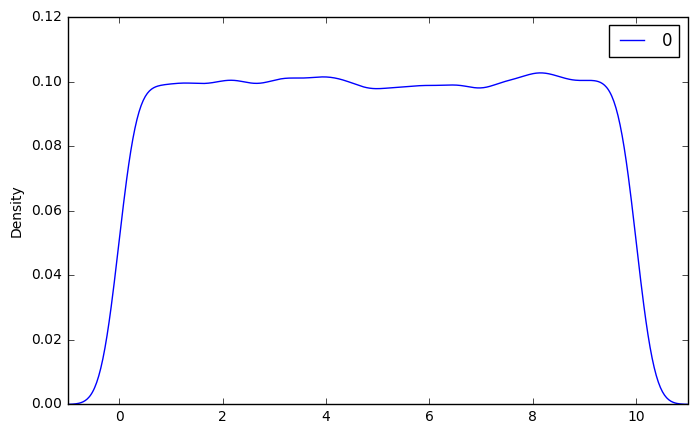

In [2]:
uniform_data = stats.uniform.rvs(size=10000, loc = 0, scale=10)
pd.DataFrame(uniform_data).plot(kind='density',figsize=(8,5),xlim=(-1,11))

In [3]:
stats.uniform.cdf?

In [3]:
stats.uniform.cdf(x=2.5,loc=0,scale=10)

0.25

In [5]:
stats.uniform.ppf(q=0.6,loc=0,scale=10)  #ppf是cdf的逆函数

6.0

In [6]:
stats.uniform.pdf(3,loc=0,scale=10) #probability density

0.10000000000000001

### 正态分布

[正态分布](http://baike.baidu.com/item/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)

$$f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

In [7]:
import random

In [9]:
random.randint(0,100)

80

In [12]:
random.choice([1,2,3,4,5,6])

2

In [13]:
random.random()

0.7037439832741804

In [19]:
random.seed(2016)
print([random.uniform(0,10) for x in range(4)])

[1.991629037623992, 3.4304712556925034, 3.211906924635791, 5.107546166275503]


In [15]:
random.seed(2016)
print([random.uniform(0,10) for x in range(4)])

[7.379250292770178, 4.487027599093537, 8.923718225399222, 8.753408330129322]


In [16]:
prob_under_minus1 = stats.norm.cdf(x= -1, loc = 0, scale= 1)
prob_over_1 = 1 - stats.norm.cdf(x= 1, loc = 0, scale= 1)
between_prob = 1-(prob_under_minus1+prob_over_1)
print(prob_under_minus1, prob_over_1, between_prob)

0.158655253931 0.158655253931 0.682689492137


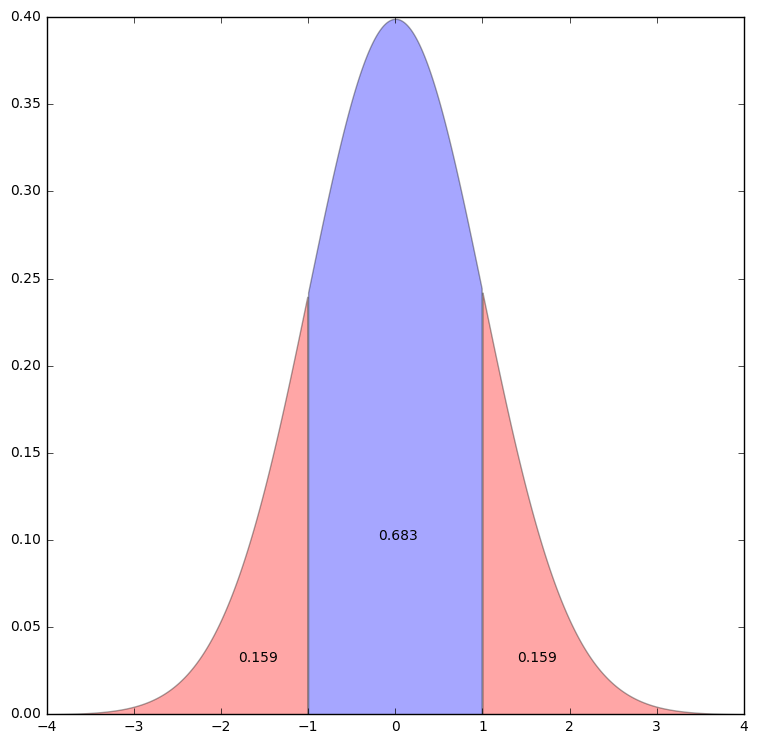

In [17]:
plt.rcParams["figure.figsize"] = (9,9)
plt.fill_between(x=np.arange(-4,-1,0.01), y1= stats.norm.pdf(np.arange(-4,-1,0.01)) , facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(1,4,0.01), y1= stats.norm.pdf(np.arange(1,4,0.01)) , facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(-1,1,0.01), y1= stats.norm.pdf(np.arange(-1,1,0.01)) , facecolor='blue', alpha=0.35)
plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

In [20]:
print( stats.norm.ppf(q=0.159) )
print( stats.norm.ppf(q=0.025) )
print( stats.norm.ppf(q=0.975) )

-0.998576270616
-1.95996398454
1.95996398454


### binomial分布

[二项分布](http://baike.baidu.com/item/%E4%BA%8C%E9%A1%B9%E5%88%86%E5%B8%83)

二项分布（Binomial Distribution），即重复n次的伯努利试验（Bernoulli Experiment），用$\eta$表示随机试验的结果。如果事件发生的概率是P,则不发生的概率q=1-p，N次独立重复试验中发生K次的概率

$$P(X=k)={n \choose k}p^k(1-p)^{n-k}=b(k;n,p)$$

In [29]:
fair_coin_flips

array([5, 3, 5, ..., 8, 3, 4])

col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts  13  108  452  1212  1991  2405  2063  1160  487  100   9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A798908>]], dtype=object)

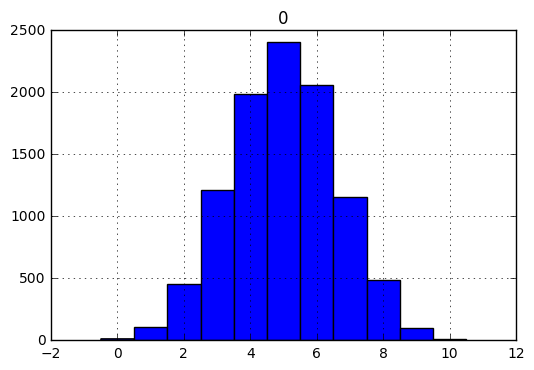

In [28]:
fair_coin_flips = stats.binom.rvs(n=10, p=0.5, size=10000)
print( pd.crosstab(index="counts", columns= fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  10  51  290  890  2018  3024  2652  1065


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B992A58>]], dtype=object)

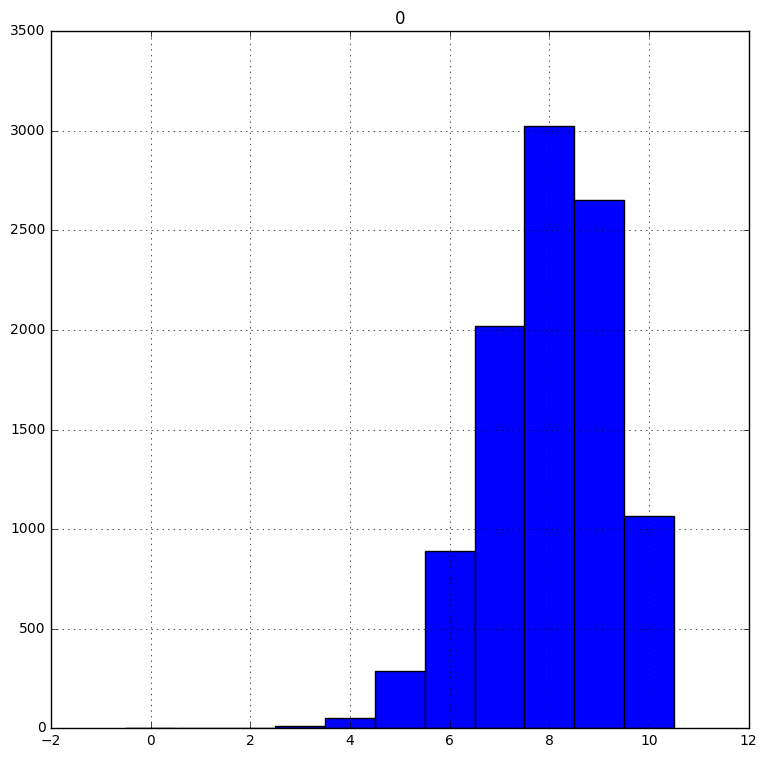

In [20]:
biased_coin_flips = stats.binom.rvs(n=10,p=0.8,size=10000)
print( pd.crosstab(index="counts", columns= biased_coin_flips))
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

In [31]:
stats.binom.cdf(k=5, n=10, p=0.8) #k<=5

0.032793497599999964

In [23]:
1-stats.binom.cdf(k=8, n=10, p=0.8) #k=9 or 10

0.37580963840000003

In [32]:
stats.binom.pmf(k=5, n=10, p=0.8) #离散概率分布用probability masss ,连续用probability density

0.026424115200000039

In [33]:
stats.binom.ppf(q=0.03279,n=10,p=0.8)

5.0

### 几何分布

在n次伯努利试验中，试验k次才得到第一次成功的机率。详细地说，是：前k-1次皆失败，第k次成功的概率

[](http://baike.baidu.com/item/%E5%87%A0%E4%BD%95%E5%88%86%E5%B8%83)

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  17
row_0                                                                      
counts  4969  2536  1280  614  297  137  79  41  26   6   7   4   2   1   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B06FE10>]], dtype=object)

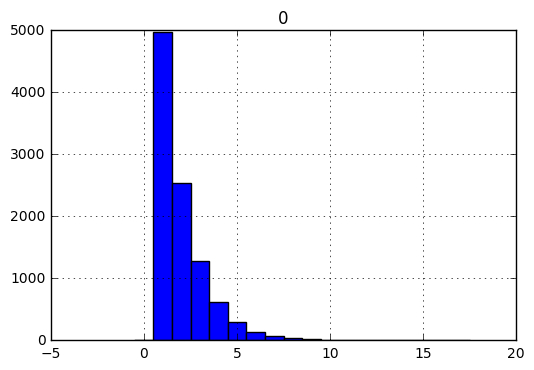

In [35]:
random.seed(2016)
flips_till_heads = stats.geom.rvs(size=10000, p=0.5)
print( pd.crosstab(index="counts", columns= flips_till_heads))
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5) , bins=max(flips_till_heads)+1)

In [39]:
first_five = stats.geom.cdf(k=5,p=0.5)
print(first_five)
1 - first_five

0.96875


0.03125

In [30]:
stats.geom.pmf(k=2,p=0.5)

0.25

### poisson分布

泊松分布表示的是事件发生的次数，“次数”这个是离散变量，所以泊松分布是离散随机变量的分布。

指数分布是两件事情发生的平均间隔时间，“时间”是连续变量，所以指数分布是一种连续随机变量的分布。

可以用等公交车作为例子：
某个公交站台一个小时内出现了的公交车的数量 就用泊松分布来表示
某个公交站台任意两辆公交车出现的间隔时间 就用指数分布来表示

[泊松分布](http://baike.baidu.com/item/%E6%B3%8A%E6%9D%BE%E5%88%86%E5%B8%83)

col_0      0     1     2    3    4   5  6  7  8
row_0                                          
counts  3656  3705  1833  601  161  38  4  1  1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4240F0>]], dtype=object)

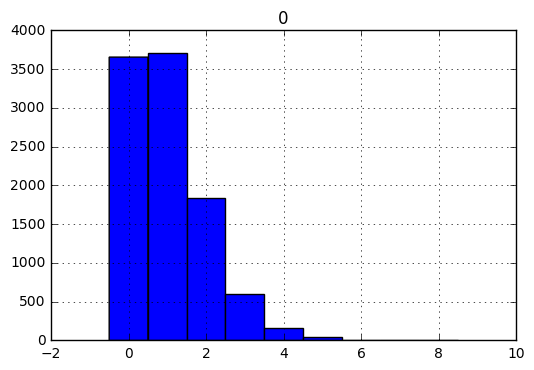

In [13]:
random.seed(2016)
arrival_rate_1 = stats.poisson.rvs(size=10000, mu=1 )
print( pd.crosstab(index="counts", columns= arrival_rate_1))
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5) , bins=max(arrival_rate_1)+1)

col_0   1   2   3    4    5    6    7     8     9     10 ...  18  19  20  21  \
row_0                                                    ...                   
counts   4  15  78  209  384  595  931  1049  1270  1280 ...  83  45  17   7   

col_0   22  23  24  25  26  27  
row_0                           
counts   2   2   2   2   1   1  

[1 rows x 27 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0CD5C0>]], dtype=object)

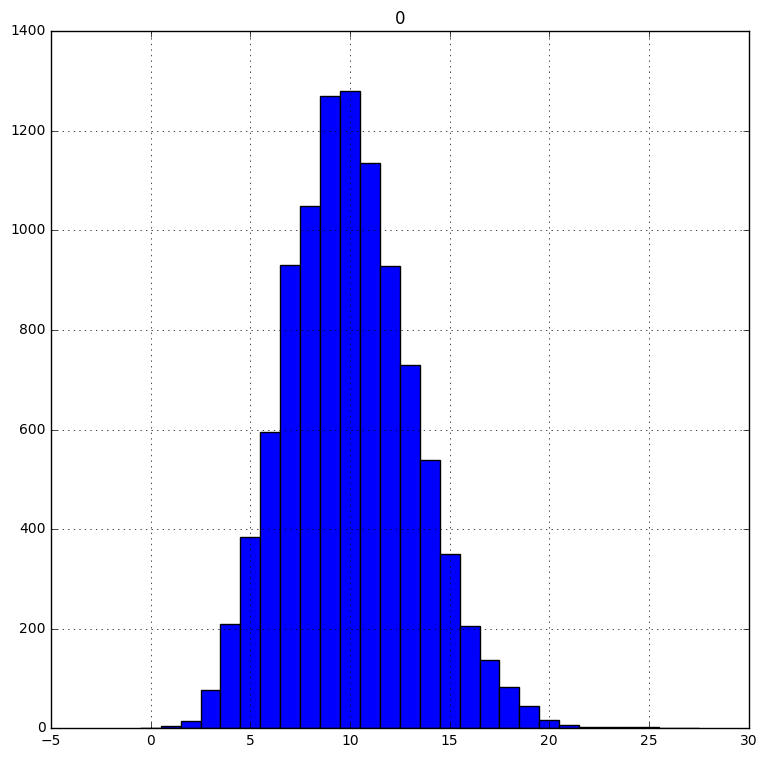

In [35]:
random.seed(12)
arrival_rate_10 = stats.poisson.rvs(size=10000, mu=10 )
print( pd.crosstab(index="counts", columns= arrival_rate_10))

pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5) , bins=max(arrival_rate_10)+1)

In [36]:
stats.poisson.cdf(k=5,mu=10) #每时间单位10辆车到站，那么少于或等于5辆的概率？

0.067085962879031888

In [32]:
stats.poisson.pmf(k=10,mu=10) 

0.12511003572113372

### 指数分布

[指数分布](http://baike.baidu.com/item/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)

已知平均每小时出生3个婴儿，请问接下来15分钟，会有婴儿出生的概率?

In [6]:
stats.expon.cdf(x=0.25, scale=1/3)  #scale为arrival rate, 1/3. 15/60=0.25时间单位

0.52763344725898531

接下来的15分钟到30分钟，会有婴儿出生的概率?

In [27]:
stats.expon.cdf(x=0.5, scale=1/3)-stats.expon.cdf(x=0.25, scale=1/3)

0.2492363925925849

In [30]:
1-stats.expon.cdf(x=2, scale=1/3)  #间隔2小时才出生

0.0024787521766663767

In [12]:
# 
prob_1 = stats.expon.cdf(x=1, scale=1/3)

1 - prob_1

0.049787068367863951

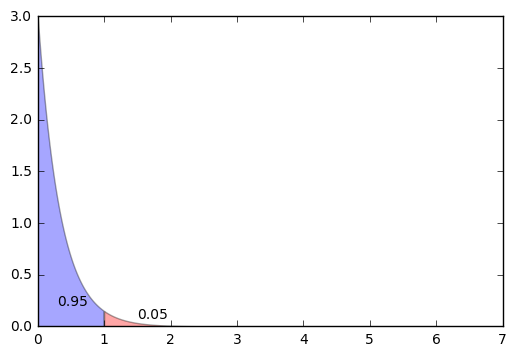

In [13]:
plt.fill_between(x=np.arange(0,1,0.01), y1= stats.expon.pdf(np.arange(0,1,0.01),scale=1/3) , facecolor='blue', alpha=0.35)
plt.fill_between(x=np.arange(1,7,0.01), y1= stats.expon.pdf(np.arange(1,7,0.01),scale=1/3) , facecolor='red', alpha=0.35)
plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

随着间隔时间变长，事件的发生概率急剧下降，呈指数式衰减。想一想，如果每小时平均出生3个婴儿，上面已经算过了，下一个婴儿间隔2小时才出生的概率是0.25%，那么间隔3小时、间隔4小时的概率，是不是更接近于0？